<b>Predict width using height. Implement this using Linear Regression Algorithm. Find the accuracy, MSE, MAE, best fit line & lastly save your model using pickle & joblib.</b>

<h4> <b>Library Call </b></h4>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts

<h2><b>Analysis Dataset</b></h2>

In [3]:
df = pd.read_csv("height_weight.csv") #Calling Dataset and store in df

In [4]:
df.head() #checking my dataset is loading or not

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [5]:
df.describe() #show all counting describe

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [6]:
df.isnull() #check every items null value - if null thein print fasle otherwise print true

,Height,Weight
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
3496,False,False
3497,False,False
3498,False,False
3499,False,False


In [7]:
df.isnull().sum() # Check how many row and columns are null

Height    0
Weight    0
dtype: int64

<h2><b>Visualization</b></h2>

Text(0, 0.5, 'Weight')

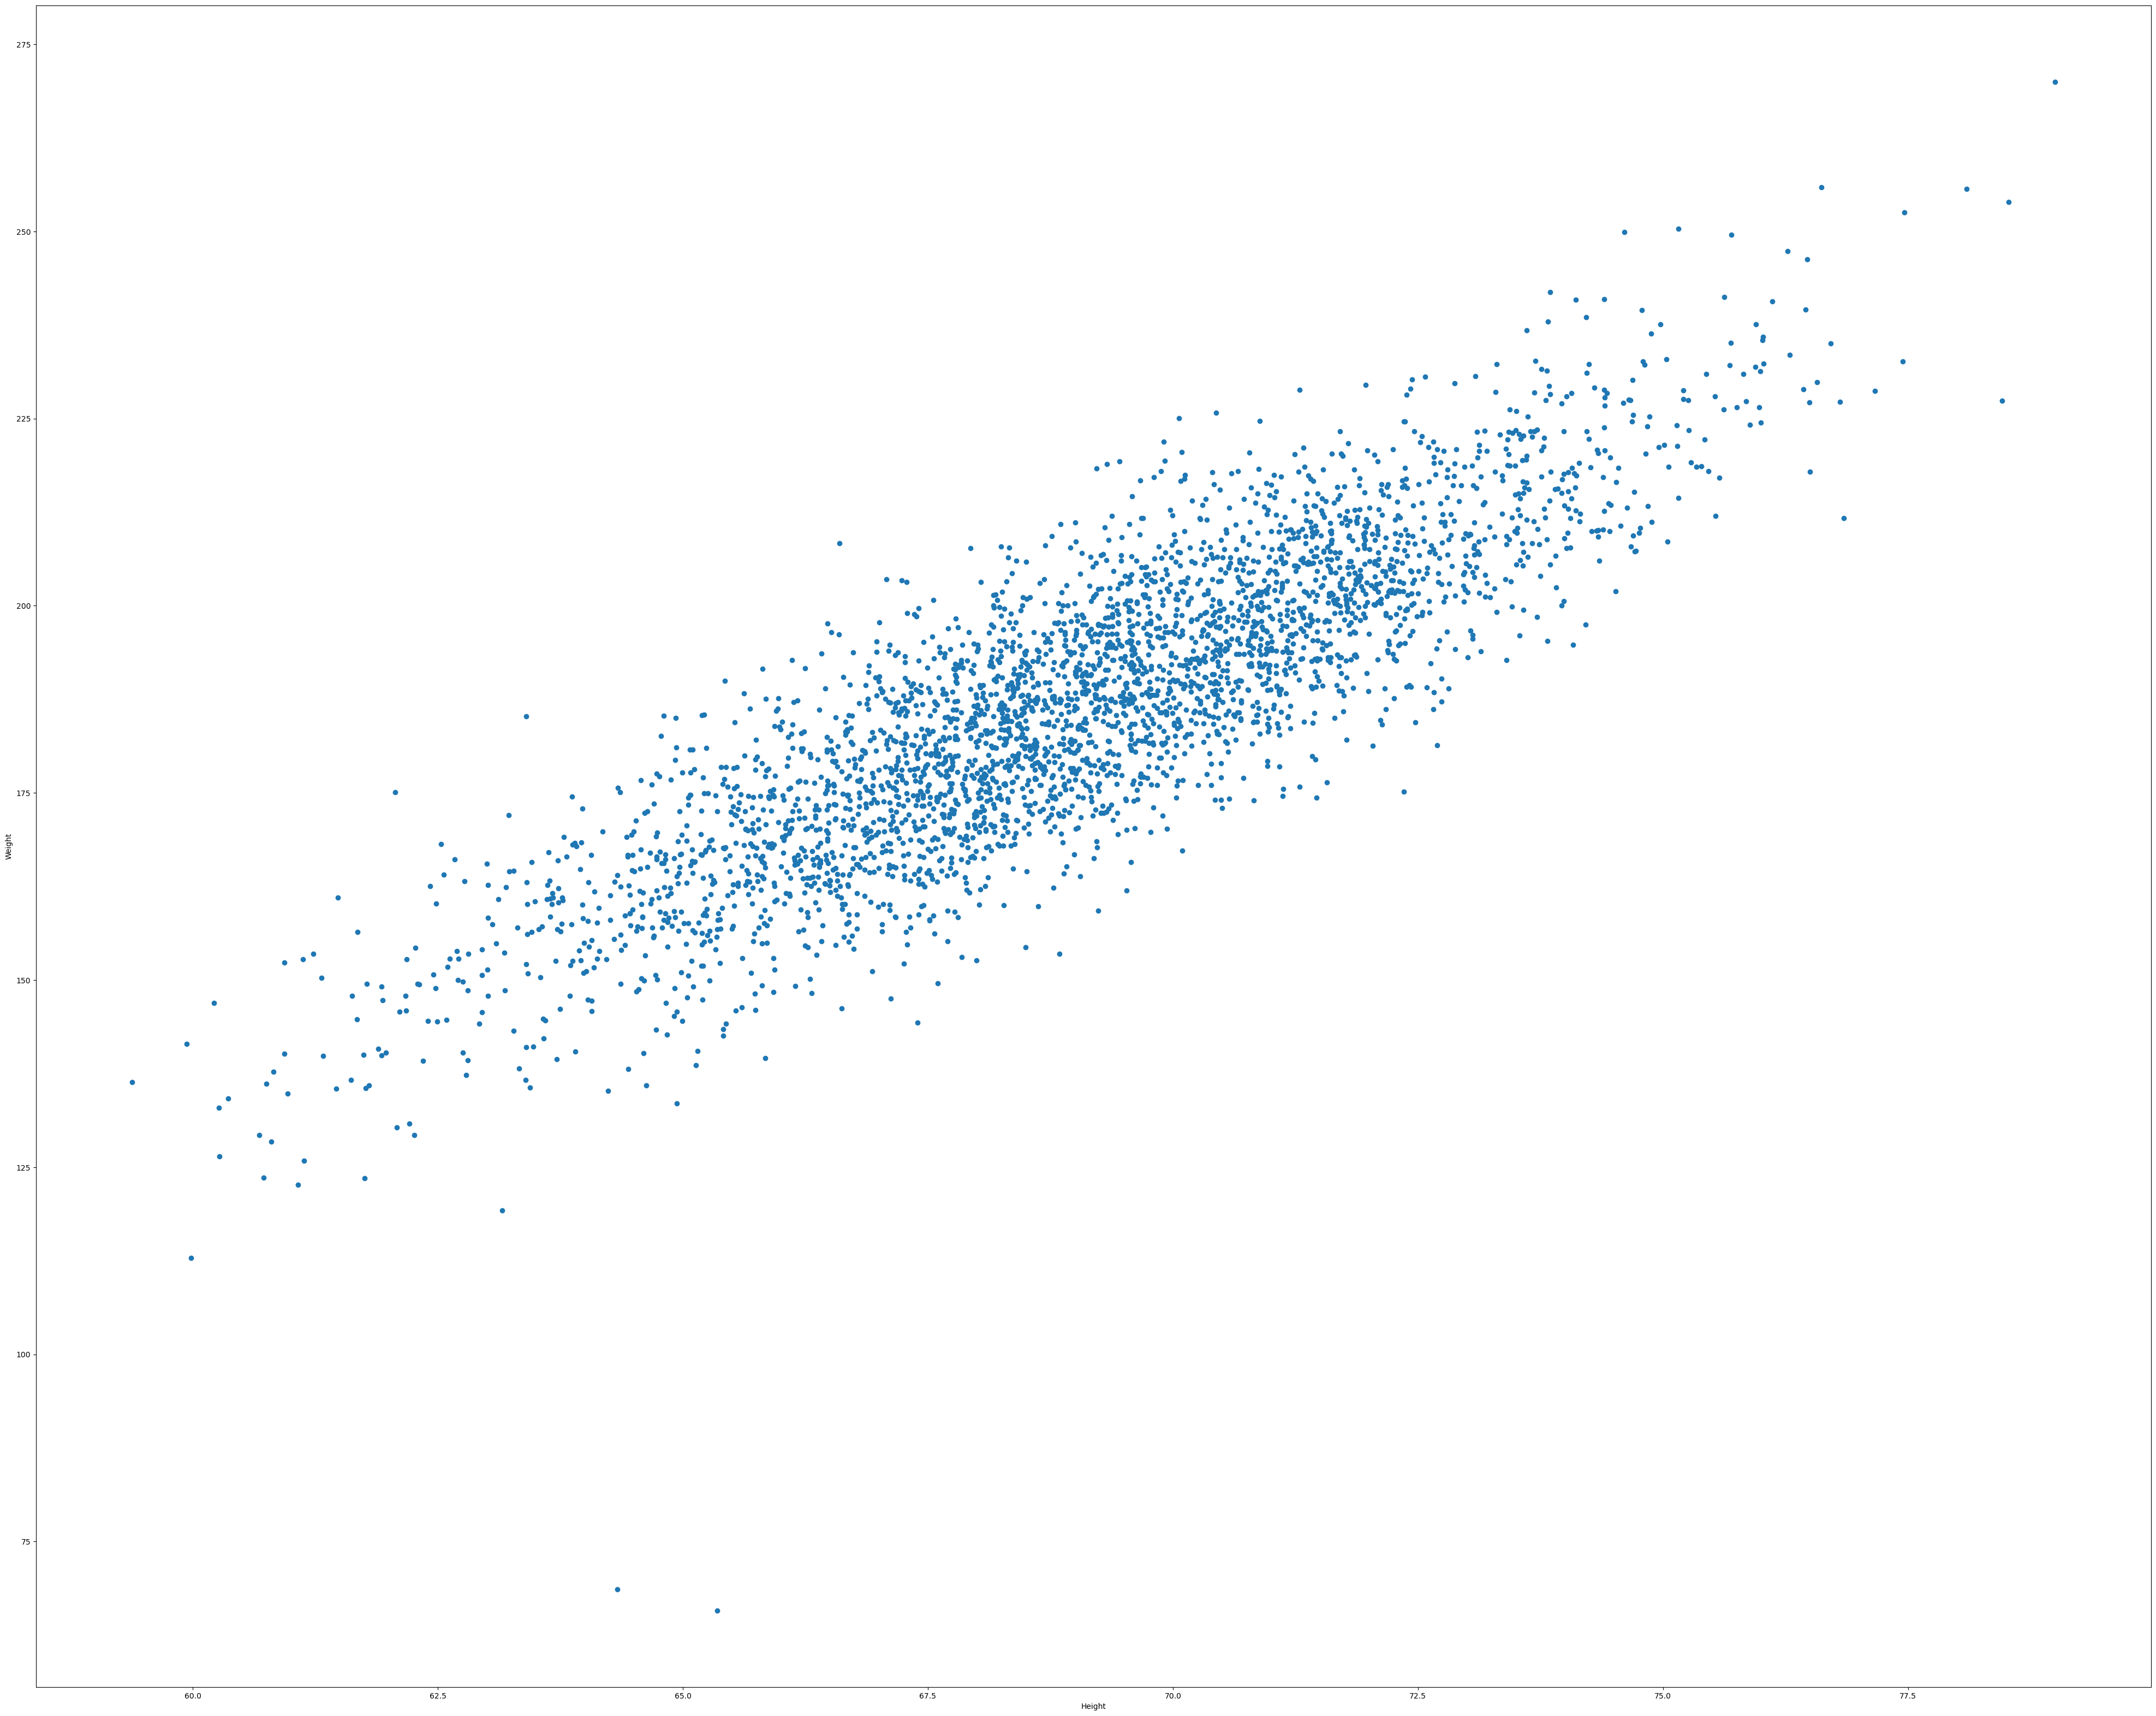

In [57]:
plt.figure(figsize=(50,40))
plt.scatter(df.Height, df.Weight)
plt.xlabel("Height")
plt.ylabel("Weight")

<h4><b>Initial stage for Training</b></h4>

In [58]:
x = df[["Height"]]
x

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
3496,69.296830
3497,70.542201
3498,73.912549
3499,67.396021


In [61]:
y = df[["Weight"]]
y

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801
...,...
3496,185.649086
3497,210.198845
3498,202.429960
3499,144.277671


In [62]:
xtest,xtrain,ytest,ytrain = tts(x,y,test_size=0.4, random_state = 1)

<h4><b>Check xtrain, xtest, ytrain, ytest</b></h4>

In [63]:
xtrain

,Height
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902
...,...
2879,69.368221
3393,68.205541
3499,67.396021
1826,71.411475


In [64]:
xtest

,Height
2930,72.363354
1532,66.540789
1260,67.757361
3123,72.445634
2013,72.664406
...,...
2763,68.457061
905,66.539812
1096,75.999957
235,70.555244


In [65]:
ytrain

,Weight
719,192.672676
2296,187.491501
3083,191.563495
1296,177.909685
2234,165.313807
...,...
2879,187.333481
3393,178.905300
3499,144.277671
1826,210.430611


In [66]:
ytest

,Weight
2930,216.056503
1532,173.474397
1260,186.099016
3123,202.993331
2013,219.877298
...,...
2763,186.208566
905,175.093255
1096,224.440459
235,198.460249


<h2><b>Linear Regression</b></h2>

<h4><b>Import Library</b></h4>

In [67]:
from sklearn.linear_model import LinearRegression

In [72]:
reg = LinearRegression()
reg.fit(xtest,ytest)

# reg.fit(xtest, ytest) is the process of training a linear regression model to find 
# the best-fit line that predicts the target variable (ytest) based on the given input 
#features (xtest).

LinearRegression()

In [73]:
m = reg.coef_
m

array([[5.97152496]])

In [74]:
c = reg.intercept_
c

array([-225.45650481])

In [75]:
# We know Y = mx + c

y = m * 67.396021 + c
y

array([[177.00051669]])

In [77]:
reg.predict([[67.396021]])

C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[177.00051669]])

In [78]:
pred = reg.predict(xtest)
pred

array([[206.66307159],
       [171.89347955],
       [179.15826555],
       ...,
       [228.37913555],
       [195.86589425],
       [194.15873063]])

In [80]:
df["Predicted Result"] = reg.predict(x)
df

,Height,Weight,Predicted Result
0,73.847017,241.893563,215.522800
1,68.781904,162.310473,185.276352
2,74.110105,212.740856,217.093839
3,71.730978,220.042470,202.886823
4,69.881796,206.349801,191.844383
...,...,...,...
3496,69.296830,185.649086,188.351245
3497,70.542201,210.198845,195.788012
3498,73.912549,202.429960,215.914127
3499,67.396021,144.277671,177.000515


<h2><b>Mean Absolute Error and Mean Squared Error</b></h2>

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [82]:
mae = mean_absolute_error(ytest, pred)
mae

7.943096890200309

In [83]:
mse = mean_squared_error(ytest, pred)
mse

103.37136346233046

<h4><b>Best Fit in line</b></h4>

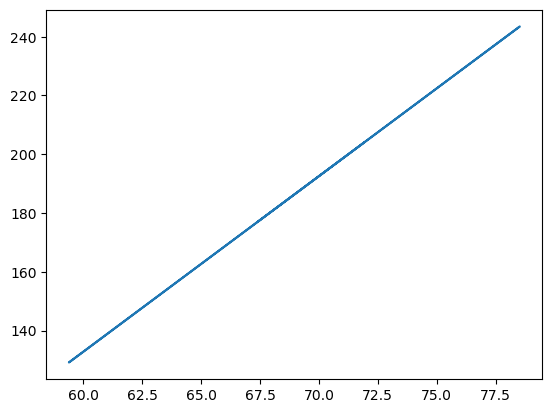

In [85]:
plt.plot(xtrain, reg.predict(xtrain))

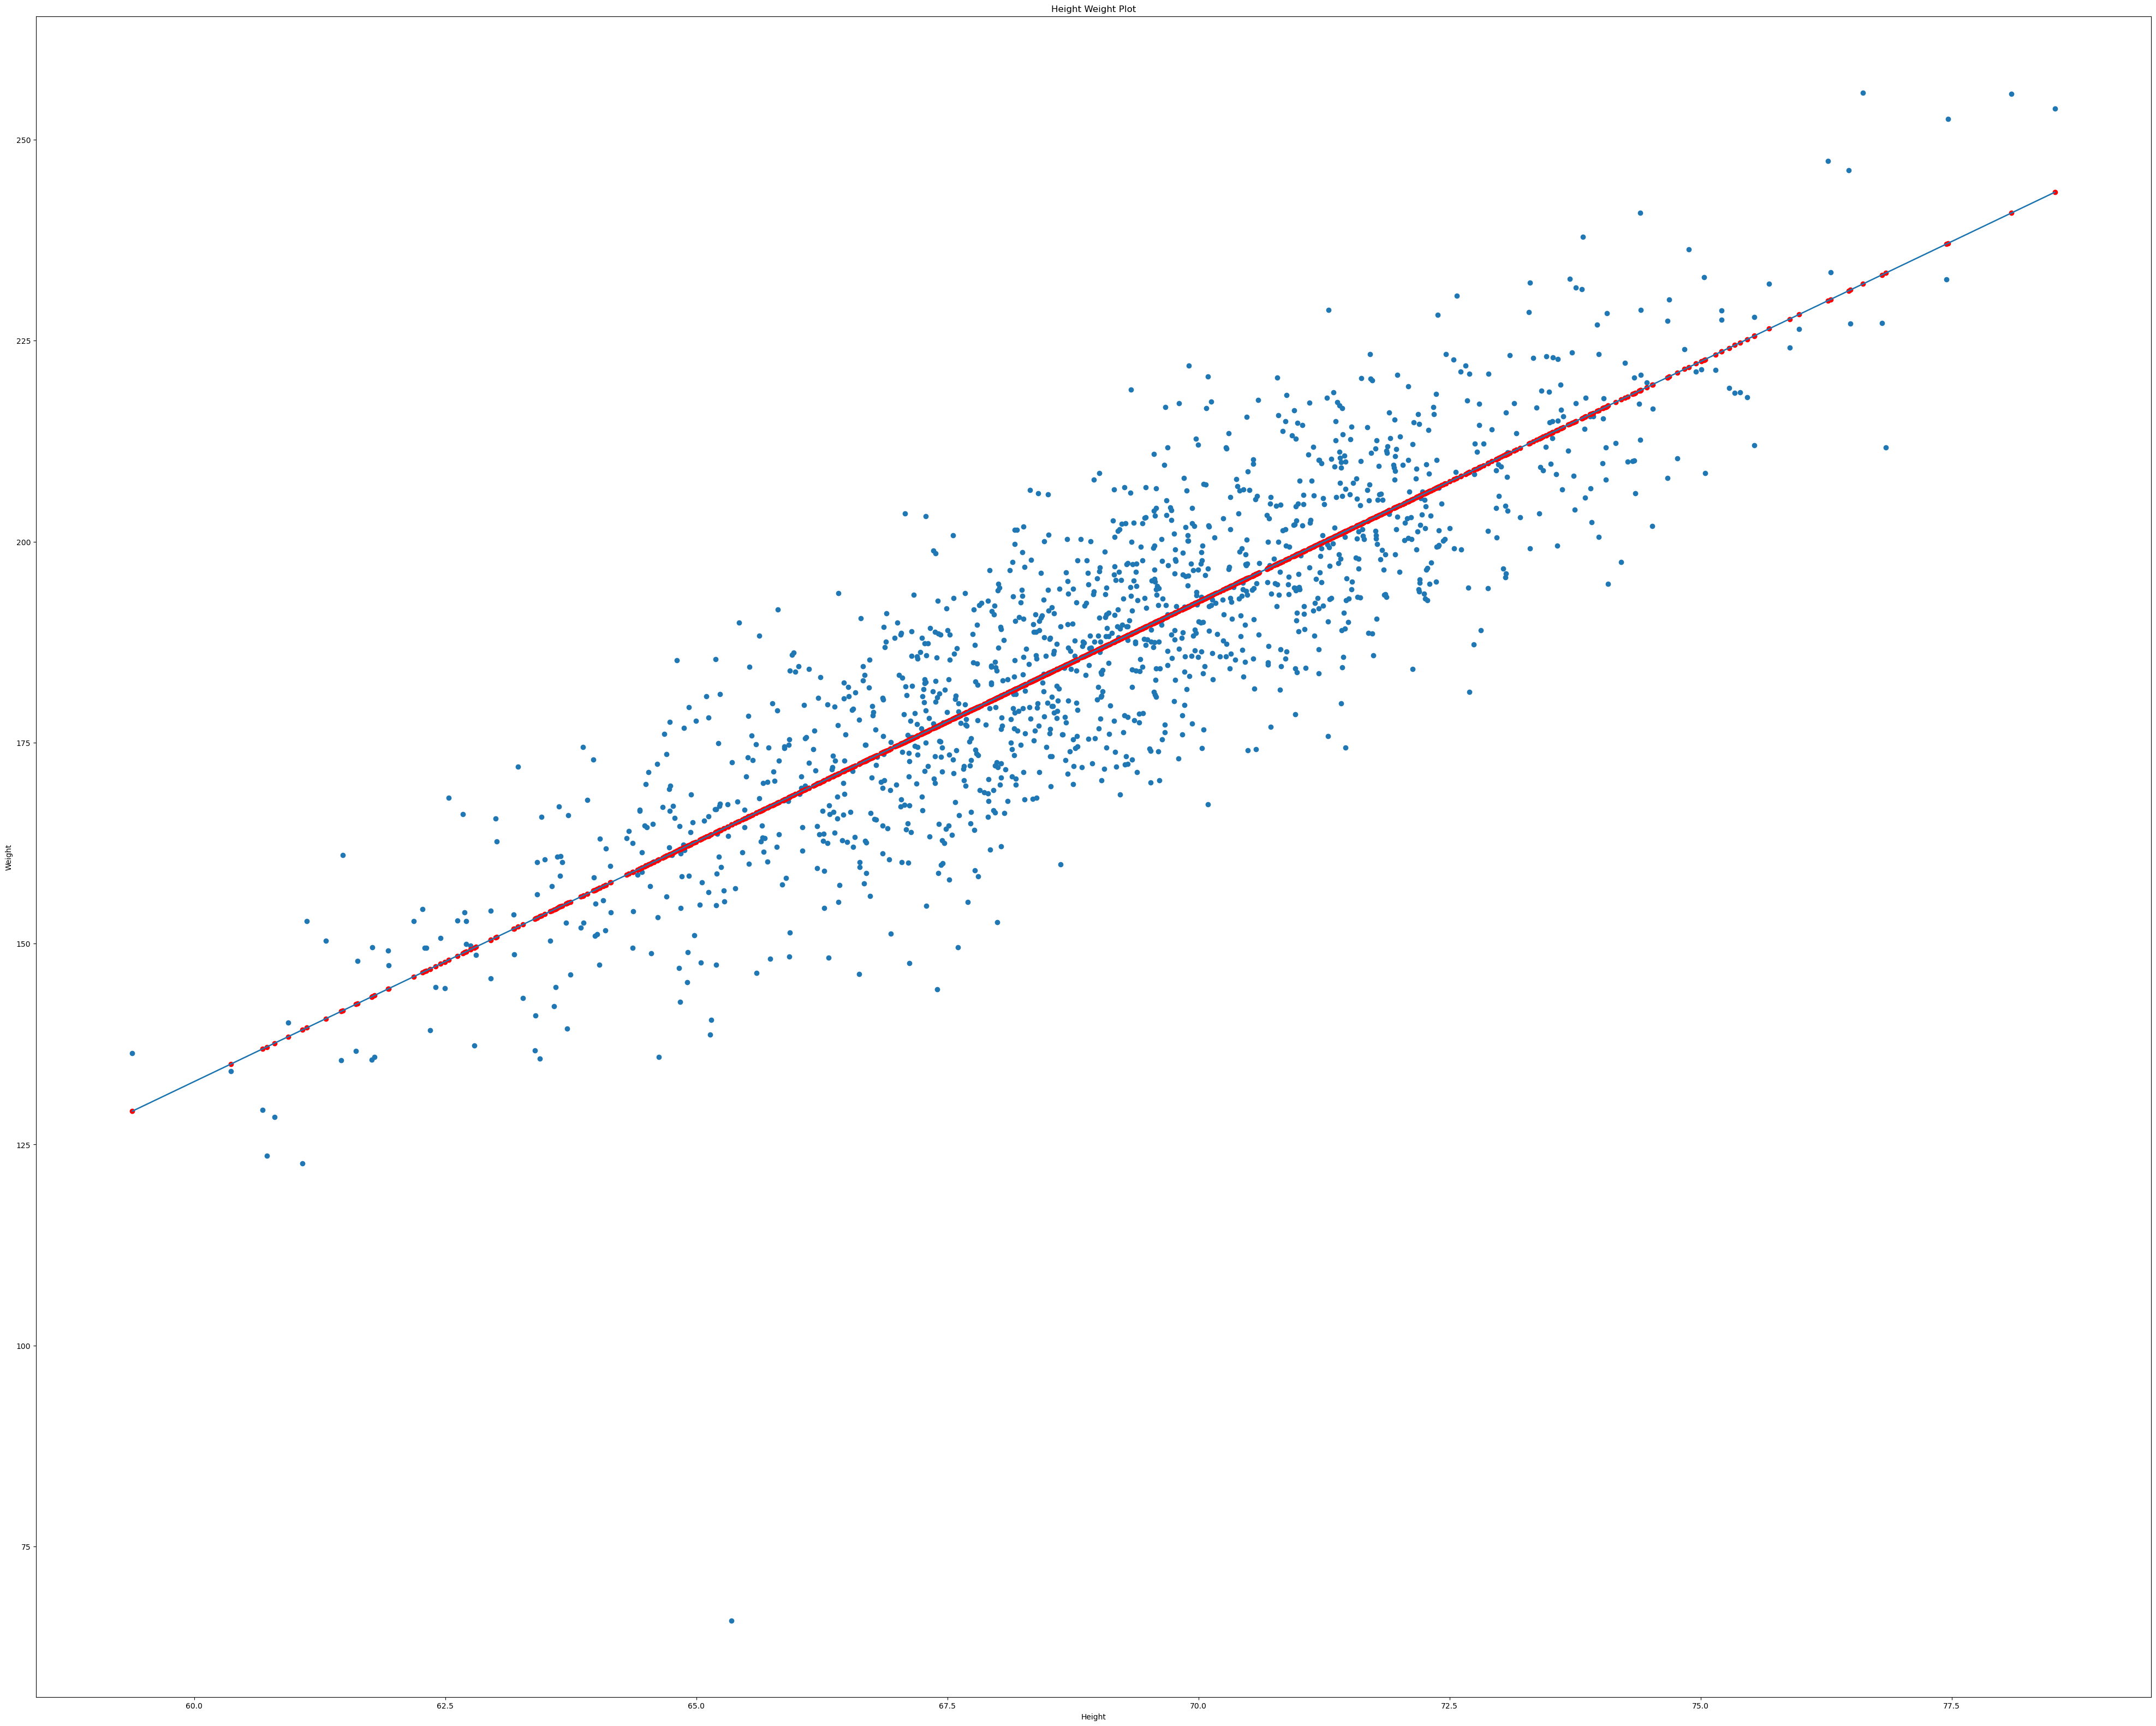

In [91]:
plt.figure(figsize = (50, 40))
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height Weight Plot")
plt.scatter(xtrain, ytrain)
plt.plot(xtrain, reg.predict(xtrain))
plt.scatter(xtrain, reg.predict(xtrain), color = "red")

In [92]:
from sklearn.metrics import r2_score
r2_score(ytest, pred)

0.7321152057026218

In [93]:
xtest.to_csv("xtest.csv")
xtest

,Height
2930,72.363354
1532,66.540789
1260,67.757361
3123,72.445634
2013,72.664406
...,...
2763,68.457061
905,66.539812
1096,75.999957
235,70.555244


<h2><b>Save Model</b></h2>

In [94]:
import pickle as pk
import joblib as jb

In [95]:
pk.dump(reg, open("first", "wb"))

In [96]:
reg2 = pk.load(open("first", "rb"))

In [98]:
reg2.predict([[66.539812]])

C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[171.88764328]])

In [99]:
jb.dump(reg, "second")

['second']